<font size = 6> <b>Programming: putting things together</b></font>

In this NB we go through some of the steps in solving problems and packaging the solutions into python scripts.

# Exercise 1

Our goal in this exercise is to write a function that removes all elements of a sequence that do not occur at least two times.   

Note: This should remind you of an exercise from a previous notebook but refresh your memory and try it anyway.  We are going to proceed by steps and in the final step in this exercise we are going to write the function described above. 

We'll break the problem into two parts.

Using the string `test_str`, write a `for` loop that **counts**
the number of times each item in `test_str` occurs. We will store these counts in
a dictionary.  We are going to do this using a special kind of dictionary called a `Counter`.  If you know enough about `Counter`s to do this without a `for`-loop, go ahead and do so.  Otherwise, write a `for`-loop that loops through the string using `ctr` (defined in line 4 below) to  keep count of how many times each character has occurred.  Use the `test_str` defined below to test your code.  

In [ ]:
test_str = 'abracadabra'
from collections import Counter

ctr = Counter()
#[Your for loop to get all the counts for items in test_str]
ctr

If you defined `ctr` correctly, it should look like this:

```
Counter({'a': 5, 'r': 2, 'b': 2, 'c': 1, 'd': 1})
```

Morevover if you want to know the count of some character in `test_str`, you do like this

```
In [5]: ctr['a']
Out[5]: 5
```

Having now counted, we are going to write a line of code that removes all elements of `test_str` that do not occur at least 2 times.  Hint:  You should use a list-comprehension with a test:

```
[x for x in test_str if **test**]
```

This collects only the members of `test_str` that pass the test.

In the final step we put all the code we've written into a function that not only works on `test_str`, but on any sequence, returning a version of the sequence with all singleton elements removed.  We've started the function definition below.  Remember to use `return`.

In [ ]:
def remove_singletons (seq):
    #[Your code here]
    pass


# Some items to test on follow
test_str1  = 'abracadabra'
# Make sure to be okay on a boundary case
test_list1 = []
# Make sure to be able to do nothing
test_list2 = list(range(7))
# Another kind of boundary case
test_str2 = test_str1 + test_str1

print(remove_singletons(test_str1))
print(remove_singletons(test_list1))
print(remove_singletons(test_list2))
print(remove_singletons(test_str2))

The steps we took:


1.  **Analysis**. Break the problem down into steps you know how to do in Python (yes, this is the hard part).  We know how to count the number of occcurrences of the elements of a container.  We know how filter out things that don't meet some criterion.  We broke the task of producing a sequence with the singletons removed into those two doable pieces.  
2.  **Be example based.**  Write the code to execute one of your steps on one of your examples.  Interact with Python at this stage.  Get the basic idea working.
3.  **Write a function**. Turn your code into a reusable function.
4.  **Test**.  Test on a variety of cases.  Frequently I'll give you a set of cases to test on in an exercise. As you get more experienced you'll be able to generate your own useful test items.  If this is going to be a reusable piece of code you're going to change and maintain for a while, this is an extremely iomportant step.  You're building your first test suite.

# Exercise 2: For loops with Sudoku

Just execute the code cell below.  We need it for the discussion and exercises that follow.

In [ ]:
digits   = '123456789'
rows     = 'ABCDEFGHI'
cols     = digits
squares  = [r+c for r in rows for c in cols]
unitlist = ([[r+c for r in rows] for c in cols] + 
           [[r+c for c in cols] for r in rows] + 
           [[r+c for r in rs for c in cs] for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])

# Assign to each square s, 3 sets of squares, the unique row and column and box s belongs to.
units = dict((s, [u for u in unitlist if s in u])
             for s in squares)
## Assign to each square s a set of squares, namely those that cant have the same value as s.
peers = dict((s, set(sum(units[s],[]))-set([s]))
             for s in squares)
grid1  = '003020600900305001001806400008102900700000008006708200002609500800203009005010300'
grid1_soln = '483921657967345821251876493548132976729564138136798245372689514814253769695417382'
grid2  = '003020600900305001001806400008102900700000008006708200002689500800203009005010300'

The code above defines the row labels in a Sudoku puzzle  in a variable `rows`. Write a `for`-loop that prints out the row labels in a Sudoku puzzle.

The code above defines the column labels in a Sudoku puzzle  in a variable `cols`. Write a `for`-loop that prints out the column labels in a Sudoku puzzle.

Write a list comprehension that returns a list of the squares in rows `ABC` a Sudoku puzzle.  For a hint, look at the list comprehension that defines `squares` in the code above.

In [ ]:
ABC  = [] # Put your list comprehension in the the square 

In [ ]:
ABC

If the variable `squares` had not been precomputed for you, you could also have computed it yourself with a **double loop** in a list comprehension, as discussed in [the section on loops](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/book_draft/programming_intro/list_comprehension.html) in the online text.

In [ ]:
[r+c for r in rows for c in cols]

This is an example of a very important idea with applicability to a lot of computations.  You're pairing every element in `rows` with every element in `cols`. That's called taking the cross-product of the two containers.  So now let's turn this idea into a function that won't just apply to `rows` and `cols`, but to any two containers with elements that can be combined with `+`. Let's call the function `cross` and the two containers that are its arguments `A` and `B`.  Finish the definition below.

In [3]:
def cross (A, B):
    return [your list comprehension code here]

Try writing another function `cross2tuple` that works as follows:

In [4]:
cross2tuple(('rock','paper','scissors'),('rock','paper','scissors'))

[('rock', 'rock'),
 ('rock', 'paper'),
 ('rock', 'scissors'),
 ('paper', 'rock'),
 ('paper', 'paper'),
 ('paper', 'scissors'),
 ('scissors', 'rock'),
 ('scissors', 'paper'),
 ('scissors', 'scissors')]

One of the most powerful things about functions is that it allows you to **simplify**.  Once you identify an important operation like `cross` you can see it in other computations.  Consider the definition of `units` given below.  We want to create a list that contains all
of the **units**, that is, all
of the columns (9 groups of squares) all of the rows (9 groups of squares) and
all of the boxes (again, 9 groups of squares).  In the code above (adapted from
Norvig's code) this was done by concatenating together three lists, as shown
in the snippet below.  Line 1 computes a list of the 9 columns; line 2 a list the 9 rows,
and lines 3 & 4 a list of the 9 squares.
```
1 unitlist = ([[r+c for r in rows] for c in cols] +
2             [[r+c for c in cols] for r in rows] +
3             [[r+c for r in rs for c in cs] for rs in ('ABC','DEF','GHI') 
4                                            for cs in ('123','456','789')])
```
Notice that each line involves a `cross` operation.  In line 1, we take a column `c`
and *cross* all the things in `rows` with all the things in `c` (namely `c`).  Similarly in
line 2, we take a row `r` and *cross* it with all things in `cols`.  Finally, to compute the contents of each box unit, we *cross* the rows in that box unit with the cols in that box unit. So with `cross` defined, we can rewrite the code above as
```
1 unitlist = [cross(rows,c) for c in cols] +
2            [cross(r,cols) for r in rows] +
3            [cross(rs,cs) for rs in ('ABC','DEF','GHI') 
4                          for cs in ('123','456','789')]
```
Notice the code's much easier to read and understand.  We don't have to rethink the parts of a *cross* operation each time we get to one.  That simplification of the comprehension process is one of the huge benefits of functions.

The code for `cross` is also quite general.  Thinking about what the code does, answer the following questions.

1. Suppose `A` is of length 3.  Does `B` have to also be of length 3 in order for `cross(A,B)`
to make sense?
2. Suppose `A` is of length `M` and `B` is of length `N`.  What is the length of `cross(A,B)`?
3. Try to guess what `cross([1,1,1],[-1,-1,-1,-1])` will be and describe your in answer in a single sentence.  Verify it using Python.
4. Try to guess what `cross(['1','1','1'],['-1','-1','-1','-1'])` will be and describe your in answer in a single sentence.  Verify it using Python.

[Your answers to questions 1-4 in prose in this markdown cell.]

In [ ]:
[Test your answers to question 3 & 4 in this code cell]

# Imports & namespaces

In this exercise we try to diagnose and fix namespace-related errors.  As discussed in the `running_python` notebook `numpy` is a module that defines a `log` function, called as follows in our notebook:

```
log(2)
```

But note that function  doesnt work here

In [5]:
log(2)

NameError: name 'log' is not defined

Of course in the running_python notebook we had automagically imported numpy functions with our 

```
%pylab inline
```

cell at the beginning of the notebook.  So let's try importing `numpy` and see if that works.

In [6]:
import numpy 
log(2)

NameError: name 'log' is not defined

Still doesn't work!

Describe what happened when you evaluate the cell above and why.  What does it have to do with namespaces?  To answer this question, you might need to review [the online book draft section on name spaces](http://gawron.sdsu.edu/python_for_ss/book_draft/anatomy/nme_space.html).

For a little extra credit, explain why `log(2)` did work in the running_python notebook.

[Your answer in this markdown cell]

The code cell below is a copy of the cell above.  Edit it and fix the problem

In [ ]:
import numpy
log(2)

The `string` module defines a character string `ascii_letters`.  The line in the code looks like this:

```
ascii_letters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
```

Fix the problem in the next cell.


In [7]:
import string
ascii_letters

NameError: name 'ascii_letters' is not defined

Finally, `numpy` is a popular module, often frequently invoked by the programs that use
it.  Hence it's convenient to give that namespace an easier-to-type *nickname* with the following
import command:

In [ ]:
import numpy as np

What would the proper fix to the namespace problem above be if you imported
`numpy` this way?

Put your answer in this markdown cell.  Note  that if you've executed both `import numpy`
and `import numpy as np`, both names for the module will work.

There's one more variant of the `import` command worth knowing, since you'll see it a loy in other people's  code
even if youdon;'t use it yourself.

In [8]:
from numpy import log

This imports just the log function and the name `log`. So the following works.

In [9]:
log(2)

0.6931471805599453

Recall that python's `math` module also defines a version of the `log` function, albeit a slightly different one.

What do you will happen when we now execute the following cell?

In [10]:
from math import log

Surprised?  Welcome to the wonderful word of powerful customization.

You now know enough to cause yourself serious grief.

Which version  of `log` do you think will now be called when you execute
`log(2)`?

Confirm or disconfirm your guess by trying out one of the features defined for one function but not
the other, as discussed in the running_python notebook.

Put your demonstration in the cell below.

The moral here is that when you do `from <module> import <name>`, you are importing `<name>` into your global namespace.

Just as when you assign any object to a name, that name is now used up. And you need to be careful
not to abuse it by giving that name another meaning.

# Namespaces and class definitions

Namespace issues also arise  whenever we have `class` definitions and instances
of classes.  The following  class definition defines the `Point`
class.  `Point` instance represent points in the `xy`-plane.  The
have methods like `distance_from_origin` and `distance` (from another
point instance).

In [18]:
import math
## Not used in class dfn below but helpful for discussion
import numpy as np

class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
       return "Point({0}, {1})".format(self.x, self.y)

    def __eq__ (self, other):
        if self.x == other.x and self.y == other.y:
            return True
        else:
            return False

    def distance_from_origin (self):
        return math.sqrt(self.x**2 + self.y**2)

    def distance(self, p2):
        return math.sqrt((p2.x - self.x)**2 + (p2.y - self.y)**2)

## Creating instances of the class

In [4]:
p1 = Point(3,4)
p2 = Point(1,2)
p3 = Point(3,4)
print((p1.x))
print((p2.y))
p1 == p3

3
2


True

To find the string to print for a class instance, `print` calls the instance's `__str__` method.

In [6]:
print(p1)

Point(3, 4)


To find the string to print out when the value of a cell is a class instance, the Python interpreter calls the instance's `__repr__` method.

Since we didn't define one above a generic inherited `__repr__` method is called.

In [7]:
p1

In [22]:
p1.z = 15

In [23]:
p1.z

15

In [15]:
p1.distance(p2)

2.8284271247461903

In [16]:
p2.distance(p1)

2.8284271247461903

There is an error raised by the code in the next cell

In [8]:
p4 = Point()

TypeError: __init__() missing 2 required positional arguments: 'x' and 'y'

Fix it  so that `p4` behaves  as follows:

In [8]:

print(p4)

Point(5, 1)


After fixing the problem, Explain what went
wrong and why your fix works.  To answer this question, you might need to review [the online book draft section on clases.](http://gawron.sdsu.edu/python_for_ss/book_draft/anatomy/classes.html).

In [ ]:
#[Your code here]

Your explanation here

## Using methods

In [ ]:
p1.distance_from_origin()

So a class defines a set of **methods**.  For the `Point` class, the methods defined above
are `__init__`, `__str__`, `distance_from_origin` and `distance`.

The `distance` method computes the distance between two points,  It is used as follows:

In [ ]:
p1 = Point(3,4)
p2 = Point(0,0)
print((p1.distance(p2)))

Not surprisingly, we got the same answer as we got for `distance_from_origin`, since we used the
origin as our second point.  But `distance` works for any two points.

In [ ]:
p1 = Point(3,4)
p2 = Point(1,2)
print((p1.distance(p2)))

Notice that  the idea of `distance`  requires computing a relationship between two points.  Since
this is a method on points, we define the function by viewing one of the points as `self` (our "point of view", so
to speak) and we just call the other point `p2`:

```
def distance(self, p2):
    return math.sqrt((p2.x - self.x)**2 + (p2.y - self.y)**2)
```

This definition says subtract the `x`-value of `self` from the `x`-value of `p2`, square that,
add the result of squaring the differnce between the `y`-value of `self` and the `y`-value
of `p2`.  Then take the square root of that sum. 

But other than the fact that we put this in a class definition, indented, this
looks just like the way we'd define the distance between two points in a function.

```
def distance(p1, p2):
    return math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
```

It is a convention to call the first variable `self` when defining a method.
Calling `distance` this way:

```
p1.distance(p2)
```

means `p1` will be `self` and `p2` will be the "other" point.  Since both `p1` and `p2` are points,
`p2` has a `distance`  method, too, and we can just as well call it this way:

```
p2.distance(p1)
```

and in this case `p2` is `self`  and `p1` is the other point.   Because
of the way the function is defined, the result will be the same:


In [ ]:
print((p2.distance(p1)))

In [ ]:
p1 = Point(3,4)

Notise what `__init__` does. It sets the two important attributes of the point, its `x`-coordinate
and its `y`-coordinate. 

```
def __init__(self, x, y):
    self.x = x
    self.y = y
```

So every point is defined to have these attributes when created, and these attributes can be
retrieved whenever needed.  

In [ ]:
p1 = Point(3,4)
print((p1.x))
print((p1.y))

Notice that both the `distance` and `distance_from_origin` methods
use these values in their definitions.

We can see what methods are defined for an instance of a class by using the `dir` (directory)
function:

In [9]:
dir(p2)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'distance',
 'distance_from_origin',
 'x',
 'y']

Notice that the output of `dir` includes the `x` and `y` attributes that are set when
the point is created. Technically `dir` just lists all the attributes  `p1` has.  The methods
are a just a special kind of attribute that can be **called** like a function.

Continuing the discussion of the methjods defined for `Point`.

The `__str__` method defines when happens when you call `print` on a `Point` instance.
What should the user see?  What is important?  Well, the fact that `p1` is a point
and maybe also its `x` and `y` attributes:

```
def __str__(self):
        return "Point({0}, {1})".format(self.x, self.y)
```

Now we print `p1` to see  the definition in action:

In [11]:
print(p1)

Point(3, 4)


The `__eq__` is called whenever `==` is called on two instances of a class,

Our definition of `__eq__` says that two points are `==` whenever their `x` and `y` coordinates are the same.

In [12]:
p1 == p2

False

In [16]:
#from numpy import arccos
import numpy as np
np.arccos(2/pow(4+9,.5))

0.982793723247329

**Optional  extended exercise**.  Modify the class so that points can either be created with
Cartesian (x,y) coordinates or Polar coordinate (angle $\theta$ and line length $\rho$).
Creating points should look like this

```
>>> from numpy import pi
>>> p1 = Point(cartesian = (2,3))
>>> p2 = Point(polar = (pi/3, 2))
```

You want any point, regardless of how it was created, to support the following

```
>>> p1.x
2
>>> p1.y
3
>>> p1.rho()
3.605551275463989  # np.sqrt of 3**2 + 2**2
>>> p1.theta()
0.982793723247329 # np.arccos(2/13)
```

The easiest way to do this is just store x and y
values in the `__init__` functiom.

```
self.x = x
self.y = y
```

Of course if `Point(polar = (pi/3, 2))` has been used,
supplying `theta` and `rho` instead of `x` and `y`,
you will have to compute `x` and `y` from `theta` and `rho`.
For that you can use the relationship

```
x = rho * np.cos(theta)
y = rho * np.sin(theta)
```

What this means is that you will need to define
the methods `rho` and `theta` as in, for example
`p1.rho()` above.  The comments above should
help.



## Class and instance namespaces

An important feature of class definitions is that the names created in the class definition are in a separate namespace.  Consider:

In [ ]:
distance_from_origin(p1)

This is a `NameError`.  The name `distance_from_origin` does not belong to the global namespace.  When
the class `Point` was defined, the class name `Point` became part of the global name space `__main__`; hence we can use it to create a `Point` instance. 

In [13]:
Point

__main__.Point

But none of the internal methods or attributes are in the global namespace.  They are accessible only
when using the class namespace, or the namespace that belongs to the instance of a class. Hence, given that 
`p1` and `p2` are class instances, all of the following are legal:

```
p1.distance_from_origin()
p2.distance_from_origin()
Point.distance_from_origin(p1)
p1.x
p1.y
p2.x
p2.y
```

Note that `x` and `y` are in the name spaces for `p1` and `p2` because the `__init__` method for `Point`
sets those attributes with the lines:

```
self.x = x
self.y = y
```


## Python types and classes

Here's an interesting feature of Python: All of the special things  you can do with types
are in fact special **methods** defined for those types, just as if they were instance
of a class.  So retrieving something from a dictionary or a list uses the 

```
__getitem__
```

method.

In [29]:
D = dict(a=1,b=2)
D.__getitem__('a')

1

This is equivalent to the much more convenient way of saying it we've learned:

In [ ]:
D['a']

If you use the `dir` function on `D`, you can see all the other special methods defined
for dictionaries.

In [31]:
dir(D)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

The `__getitem__` method is also define for lists and tuples, but of course works slightly differently than
it does for dictionaries.

In [32]:
T = tuple(range(4))

In [33]:
T

(0, 1, 2, 3)

In [34]:
T.__getitem__(2)

2

Notice that the dictionary directory listing above shows that a dictionary is defined for
the `__setitem__` method.  This is the one called for assigning values.

So

In [ ]:
D['a'] = 2

In [ ]:
D

The assignment is equivalent to

In [ ]:
D.__setitem__('a',2)

In [ ]:
D

Based on what you know about tuples, you should be able to guess whether or not tuples have a `__setitem__` method.
But let's check:

In [38]:
len(T)

4

In [35]:
dir(T)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

Nope.  No  `__setitem__` method.  Reasonably so, since tuples are immutable.

Notice that both the dictionary and tuple `dir` listing include the `__str__` method.  This has the
same use we saw above with the user-defined class `Point`: It defines the string representation
that is used when `print` is called on a dictionary or a tuple.  So with dictionaries
it will print out the familiar curly braces and with lists the familiar square brackets.

Notice that all the `dir` outputs above include the `__init__` method.  That is a method that is
always called when either a instance of a basic type or an instance of a class is called.  Notice that the syntax of creating instances is the same both cases:  The name of the type/class is called.  So we can create lists and tuples with the `list` and `tuple` function, just as we can create points with the `Point` function.

Finally there is the `__eq__` method, which defines when two instances of a type  are `==`.  For lists
this tells Python to look at each of the corresponding elements and se if they are `==`.

In [ ]:
L = [1,2,3]
M = [1,2,3]
L == M

In [ ]:
L.__eq__(M)

In [ ]:
def __eq__ ():
    if   :
        return True
    else:
        ??

So the moral of the story is that we can pretty much think of classes and types in the same way.

The behavior of a class or type is characterized by a set of methods defined by the user for user-defined
classes, and by Python for Python types.  THere is a set of methods with names of the form `__<name>__`
that have conventional interpretations across types and classes.  

In [ ]:
list()

In [ ]:
list('abc')

## Another customized class example: More about dunder methods

Those under the hood
Python methds with double underscore (`__`) in their names and special
interpretations are sometimes called **dunder** methods.

The following example is from *Fluent Python* by Luciano Ramalho. llustrates how you can make something behave like a **sequence**
just by defining `__len__` and `__get_item__`.

In [48]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]
        self._x = range(3)

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [63]:
deck = FrenchDeck()

In [50]:
deck

The following works because the `__len__` method is defined for the class `FrenchDeck`.

In [64]:
len(deck)

52

Let's look look at what's in a deck, cards.

In [65]:
card1 = Card('J','diamonds')

In [66]:
isinstance(card1, tuple)

True

A card is just a named tuple, a specialization of the builtin type `tuple` provided
by the Python collections module.

What's special is that the first and second positions in the 2-tuple have names.

In [61]:
card1 

Card(rank='J', suit='diamonds')

So the tuple can be accessed like this;

In [54]:
card1[0],card1[1]

('J', 'diamonds')

or like this:

In [71]:
card1.rank,card1.suit

('J', 'diamonds')

Meanwhile our `FrenchDeck` class has many of the properties of
a list of tuples, because it is defined for `__getitem__` and
implements the getting through a list (`self._cards`).

For example, the `FrenchDeck` class works with `in`:

In [39]:
card1 in deck

True

It can be indexed like a list, with integer position-indexes.

In [58]:
deck[2]

Card(rank='4', suit='spades')

It can be sliced and looped through like a list.

In [59]:
for cd in deck[15:20]:
    print(cd)

Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')


The for-loop works because for any class defined for `__getitem__` but not
`__iter__`, Python tries to loop by using successively higher numerical
indices, and we have set things up in `__getitem__` so that that works.

Warning: This feature can bite you, especially if you're not thinking about
it.   Consider the following silly but seemingly harmless class definition.

```
class Foo:

   def __init__ (self, a):
       self.a = a
       
   def __getitem__(self, b):
       return self.a
 

>>> f = Foo(1)
>>> f[0], f[1]
(1,1)
>>> 1 in f
True
```

So we seem to have defined a container that
contains 1 in every position.

But now we try:

```
>>> 2 in f
True
```

This seemingless harmless `in` request does not return `False`
or raise an error; it sends you into
an infinite loop.  This is because this call to `in` is a request 
to iterate through `f` seeking something equal to `2`.  So Python
tries the indices 0,1,2,3,... always returning 1 and having
no way to stop iterating.

So when implementing `__getitem__` either define an `__iter__` method
explicitly with some way to stop built in or delegate to something
that has criteria for stopping the iteration, as in the definition
of `FrenchDeck`, where `__getitem__` delegates the work to a list.

In [73]:
1 in f

True

In [72]:
f[0], f[1]

(1, 1)

## Classes provided by a module

An important point to be aware of is that many packages will provide their services via a class.

Therefore to use the modules correctly, you will have to create instances of the class (supplying all the
obligatory arguments), and know what the appropriate methods for that class are.

We already saw an example of this in teh functions notebook when we used the `networkx` package and created graph instance.

Here's another simple example, to illustrate.

In [7]:
# Import the numpy module and give it the nickname np
import numpy as np
a = np.array([1,6,3,2])
a

array([1, 6, 3, 2])

The object `a` is a `numpy` `array`.  This is
a class defined in the `numpy` module for
primarily for storing numerical data
in sequential and table form. In
this case we've constructed a 1D array that looks
a lot like like a list and shares many logical
properties with lists, including
being sequential, and being modifiable.

But there are also many attributes and methods that
`numpy` ndarrays have that lists don't.

In [27]:
a = np.array([1,6,3,2])
print('a', a)
print('a.shape', a.shape)
print('a.reshape((2,2)):')
print( a.reshape((2,2)))
print("reshaped a's shape", a.reshape((2,2)).shape)
print("a.min()", a.min(),"a.max()", a.max())
print()
a.sort()
print('a after sorting', a)
print('a.reshape((2,2)):')
print(a.reshape((2,2)))
print('a again (order of elements changed but shape unchanged)', a)

a [1 6 3 2]
a.shape (4,)
a.reshape((2,2)):
[[1 6]
 [3 2]]
reshaped a's shape (2, 2)
a.min() 1 a.max() 6

a after sorting [1 2 3 6]
a.reshape((2,2)):
[[1 2]
 [3 6]]
a again (order of elements changed but shape unchanged) [1 2 3 6]


Try the same things on a list.

In [33]:
L = [1,6,3,2]
print(L.min())

AttributeError: 'list' object has no attribute 'min'

Error.  Method not right for lists.

In [ ]:
L.sort()
print(L)

We can sort L with similar results to sorting an array.

But a list doesn't have a shape.  It's intrinsically 1 D.

In [16]:
print(L.shape)

[1, 2, 3, 6]


AttributeError: 'list' object has no attribute 'shape'

So we can sort both arrays and lists. But lists don't have "shapes".

In [36]:
L.reshape((2,2))

AttributeError: 'list' object has no attribute 'reshape'

And consequently don't have a `reshape` method.

You can usually find out what class an object belongs through its
`__class__` attribute.

You can find out whether  an instance belongs to a particular class with the builtin `isinstance` function.

In [38]:
L.__class__, a.__class__, isinstance(a,list), isinstance(a,np.ndarray)

(list, numpy.ndarray, False, True)

So far, we know an array has a `shape` **attribute** (looked up with no parentheses), like so

```
a.shape`
```

and `min`,`max`,`reshape`, and `sort` **methods**, all used with parentheses, which in some 
cases may enclose one or more **argument**s.

```
a.min(),a.max(),a.reshape((2,2)),a.sort()
```

You can find all the methods and attributes of a `n with the builtin `dir` (directory) function.

In [5]:
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

### Same ideas, using networkx

In [98]:
import networkx as nx
G = nx.Graph()

`G` is now an empty graph, no nodes, no edges.  

And that's okay.

In [99]:
G

Now let's add an edge.

In [100]:
G.add_edge(2,3)

And now another.

In [101]:
G.add_edge(3,1)

And a third and then some.

In [102]:
G.add_edge(1,2)
G.add_edge(2,4)
G.add_edge(1,5)
G.add_edge(2,5)
G.add_edge(3,5)
G.add_edge(4,5)
G.add_edge(4,1)
G.add_edge(4,3)

Now let's look at the nodes and edges.

In [104]:
G.nodes()

NodeView((2, 3, 1, 4, 5))

In [103]:
G.edges()

EdgeView([(2, 3), (2, 1), (2, 4), (2, 5), (3, 1), (3, 5), (3, 4), (1, 5), (1, 4), (4, 5)])

In fact,  `Graph` objects are quite complicated and have a huge number of special purpose methods in addition
to the two we know, `nodes` and `edges`.

Let's look.

In [86]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

One thing you don't see is a draw method.  For that we need to call a function.

Why a function and not a method?  This has to do with models of how the module will
be used and is sometimes a matter of programmer taste.  It's also possible
that more things than just graphs cam be drawn.

Here's drawing illustrated.

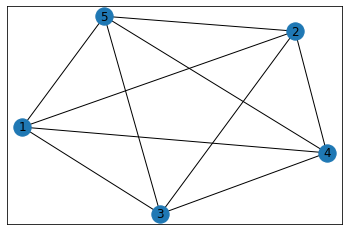

In [105]:
%matplotlib inline
nx.draw_networkx(G)